In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision = 4)
import os
import pickle 
import pandas as pd
from datetime import date
from sklearn.cluster import KMeans
from datetime import datetime

import sys
sys.path.append('./../')


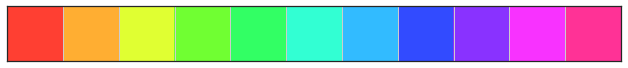

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
#sns.set_style('whitegrid')
import matplotlib
plt.rcParams["axes.grid"] = True
plt.rc('font', family='serif')
#plt.rc('font', weight='bold')

#current_palette = sns.color_palette(sns.hls_palette(15+1, l=.6, s=1.0))[::2]
#current_palette = sns.color_palette(sns.hls_palette(20+1, l=.6, s=1.0))
current_palette = sns.color_palette(sns.hls_palette(10+1, l=.6, s=1.0))

sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [3]:
def get_resultpickle(saved_filename):
    with open(saved_pickle_path + saved_filename + format_name, 'rb') as f:
        result_pickle = pickle.load(f) # 단 한줄씩 읽어옴    
    return result_pickle

def read_resultpikcle(result_pickle):
    print('#'*100)
    print('Exp_setting')
    print(result_pickle['Exp_setting'])
    if 'model_name' in result_pickle['Exp_setting'].keys():
        print('model_name : ' + result_pickle['Exp_setting']['model_name'])
    if 'kernel_type' in result_pickle['Exp_setting'].keys():
        print('kernel_type : ' + result_pickle['Exp_setting']['kernel_type'])    
    if 'semi_option' in result_pickle['Exp_setting'].keys():
        print('semisupervised_option : %s'%(result_pickle['Exp_setting']['semi_option']))   
    if 'lambda'in result_pickle['Exp_setting'].keys():
        print('alpha : %s' %(result_pickle['Exp_setting']['lambda']))   

    print('test rmse')
    print(np.asarray(result_pickle['test_rmse'][result_pickle['Exp_setting']['model_name']]))
    print('')
    return 

In [4]:
saved_pickle_path = './result_pickle_ablation/'
format_name = '.pickle'

In [709]:
filename = 'pol'
numQ = 3
ratesamplespt = 0.05
lrhyp = 0.005
iteration = 2000 #pol,parkinsons
numrep= 5
numcompmodel = 6




saved_filename0 = 'filename{0}_numQ{1}_numspt3_numtotalspt{2}_numbatch1_ratesamplespt{3}_lrhyp{4}_iter{5}_numrepexp{6}_numinitsample500_randomseed1111_kloptionTrue_datanormalTrue_evalperiod50_numcompmodel{7}_ablation'.format(filename,numQ,numQ*3,ratesamplespt,lrhyp,iteration,numrep,numcompmodel)             
saved_filename1 = 'filename{0}_numQ{1}_numspt7_numtotalspt{2}_numbatch1_ratesamplespt{3}_lrhyp{4}_iter{5}_numrepexp{6}_numinitsample500_randomseed1111_kloptionTrue_datanormalTrue_evalperiod50_numcompmodel{7}_ablation'.format(filename,numQ,numQ*7,ratesamplespt,lrhyp,iteration,numrep,numcompmodel)             
saved_filename2 = 'filename{0}_numQ{1}_numspt15_numtotalspt{2}_numbatch1_ratesamplespt{3}_lrhyp{4}_iter{5}_numrepexp{6}_numinitsample500_randomseed1111_kloptionTrue_datanormalTrue_evalperiod50_numcompmodel{7}_ablation'.format(filename,numQ,numQ*15,ratesamplespt,lrhyp,iteration,numrep,numcompmodel)             




In [710]:
saved_filename_list = [saved_filename0,saved_filename1,saved_filename2]



result_pickle_list = [get_resultpickle(ith_name)  for ith_name in saved_filename_list ] 

In [711]:
legend_dict = {'equal_reg': 'SVSS','equal_reg_nat':'SVSS Ng', 'weight_reg':'SVSS Ws ','weight_reg_nat': 'SVSS WsNg',
               'gpsm': 'gpsm','rff':'SS','gpvfe':'VFE (SM)','gpvferbf':'VFE (RBF)',
               'gpytorch_batch_ARD':'batchARD', 'gpytorch_batch_SM':'batchSM','vssgp':'VSS' ,'rffrp':'SS+RP'}

#color_dict = {'gpsm': 0 ,'equal_reg' : 1,'equal_reg_nat' : 10,'weight_reg' : 4,'weight_reg_nat' : 7 , 'gpsm_dkl' : 10}
color_dict = {'equal_reg' : 4 , 'equal_reg_nat' : 10,'weight_reg' : 5,'weight_reg_nat' : 8 , 'gpvfe' : 0 , 'rff' : 1 ,'rffrp': 2, 'vssgp' : 2, 'gpvferbf':-1}


In [712]:
#target_listed_model = ['gpvferbf','gpvfe','rff','equal_reg','equal_reg','weight_reg','weight_reg_nat']
target_listed_model = ['rff' , 'rffrp', 'equal_reg', 'equal_reg_nat','weight_reg' ,'weight_reg_nat']    
#target_listed_model = [ 'equal_reg', 'equal_reg_nat','weight_reg' ,'weight_reg_nat']    


In [713]:
import os.path
from os import path
save_figure_path  = './result_figure/exp2_UCIregression_revision_'+ filename +'/ablation/'
os.makedirs(save_figure_path) if path.isdir(save_figure_path) is False else 1
save_figure_path

'./result_figure/exp2_UCIregression_revision_pol/ablation/'

In [714]:
#static_name = 'rmse'
static_name = 'mnll'
def _get_static_over(static_name,result_pickle_list):
    """
    # mean,std,q,spt,totalspt,batch,batchtotalspt 
    """
    static_dict = {}
    for ith_result_pickle in result_pickle_list:
        Q,pt,tpt,b,evalperiod = ith_result_pickle['exp']['numQ'],ith_result_pickle['exp']['numspt'],ith_result_pickle['exp']['numtotalspt'],ith_result_pickle['exp']['numbatch'],ith_result_pickle['exp']['evalperiod']
        #print(Q,pt,tpt,b)
        for ith_model in ith_result_pickle[static_name+'_list']:
            temp_mean = np.asarray(ith_result_pickle[static_name+'_list'][ith_model]).mean(axis = 0).round(3)
            temp_std = np.asarray(ith_result_pickle[static_name+'_list'][ith_model]).std(axis = 0).round(3)
            if  ith_model not in static_dict:
                static_dict[ith_model] = [(temp_mean,temp_std,Q,pt,tpt,b,tpt*b,evalperiod)]
            else:
                static_dict[ith_model].append((temp_mean,temp_std,Q,pt,tpt,b,tpt*b,evalperiod))


    #order_dict_list = ['equal_reg', 'equal_reg_nat','weight_reg' ,'weight_reg_nat','rff' , 'gpvferbf', 'gpvfe','vssgp']
    order_dict_list = ['rff' , 'rffrp', 'equal_reg', 'equal_reg_nat','weight_reg' ,'weight_reg_nat']    
    static_dict_ordered = {}
    for ith_name in order_dict_list:
        static_dict_ordered[ith_name] = static_dict[ith_name] 
    
    #return static_dict
    return static_dict_ordered

In [718]:
if numQ >= 5:
    legend_with_figure = False
else:
    legend_with_figure = True

static_title = 'rmse' #rmse,mnll


In [719]:
save_figname = filename + '_'+static_title + '_Q'+str(numQ ) + '_ablation'

/home/yohan/Myenv/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


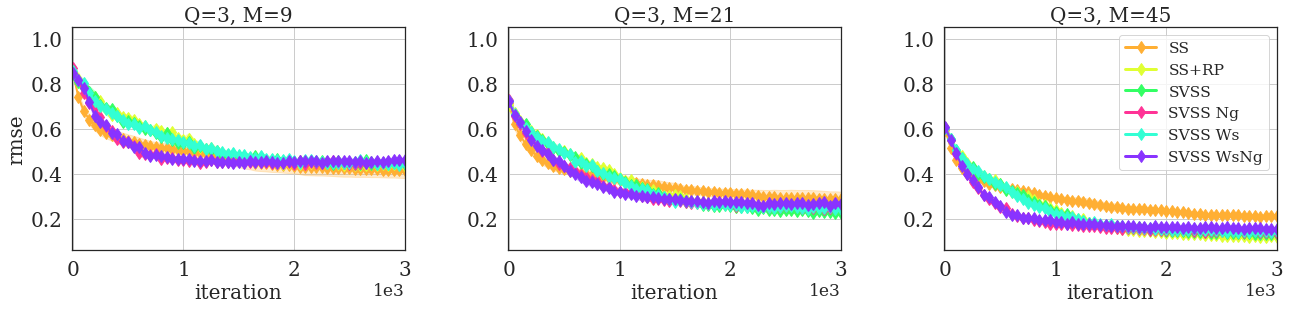

'./result_figure/exp2_UCIregression_revision_pol/ablation/pol_rmse_Q3_ablation'

In [720]:
num_case = len(result_pickle_list )

#figsiz = (14.5,5.0)
#figsiz = (6.9*num_case,4.75)
figsiz = (7.2*num_case,4.1)
wspace = .31 # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = .0  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height

markersiz = 9
line_control = 2

figure = plt.figure(figsize = figsiz)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)

#static_title = 'rmse' #rmse,mnll
static_dict = _get_static_over(static_title ,result_pickle_list)
#static_title2 = 'e'+static_title
#static_dict2 = _get_static_over(static_title2 ,result_pickle_list)


#plt.subplot(1,2,1)
for ith,ith_model in enumerate(static_dict):
    if ith_model in target_listed_model:    
        #temp_static = np.asarray(static_dict[ith_model])
        for jth in range(len(static_dict[ith_model])):
            plt.subplot(1,num_case,jth+1)            
            obsidx = np.arange(len(static_dict[ith_model][jth][0]))*static_dict[ith_model][jth][-1]
            plt.plot(obsidx,static_dict[ith_model][jth][0] ,label = legend_dict[ith_model] , marker = 'd',markersize = markersiz,color = current_palette[color_dict[ith_model]]  , linewidth = line_control)
            plt.fill_between( obsidx,
                              static_dict[ith_model][jth][0] - static_dict[ith_model][jth][1],
                              static_dict[ith_model][jth][0] + static_dict[ith_model][jth][1],
                              alpha = 0.25, edgecolor = current_palette[color_dict[ith_model]] , facecolor =  current_palette[color_dict[ith_model]] )


        
            plt.xlabel(static_title,fontsize = 20)
            #plt.xlabel('nubmer of spectral points (Q={0})'.format(numQ),fontsize = 20)
            plt.xlabel('iteration'.format(numQ),fontsize = 20)
            
            if jth == 0:
                if static_title[0] =='e' or static_title[0] =='t' :
                    plt.ylabel(static_title[1:] ,fontsize = 20)
                else:
                    plt.ylabel(static_title,fontsize = 20)

            #plt.xticks(obsidx,fontsize = 20)
            plt.xticks(fontsize = 20)            
            plt.yticks(fontsize = 20)
            
            
            
            plt.locator_params(axis='y', nbins=8)
            plt.locator_params(axis='x', nbins=6)

            plt.title('Q={0}, M={1}'.format(static_dict[ith_model][jth][2],static_dict[ith_model][jth][4]),fontsize = 20)
            


            plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
            plt.gca().yaxis.get_offset_text().set_size(17)            
            plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
            plt.gca().xaxis.get_offset_text().set_size(17)

            
            
            #plt.ylim([0.55 +0.05,1.21 + 0.1])    # skillcraft             
            #plt.ylim([0.55 +0.05,1.01 + 0.01])    # skillcraft             
            #plt.ylim([0.55 +0.05,1.01 + 0.1])    # gas            
            
            #plt.ylim([0.0-0.05,1.01 + 0.1])    # parkinsons       
            if filename == 'skillcraft':
                if static_title in ['rmse','ermse'] :
                    plt.ylim([0.64-0.02,1.32])     # skillcraft             
                    plt.xlim([0.0-10,2000])     # skillcraft            
                    plt.yticks([0.64,0.69,0.8,0.9,1.0,1.2])
                else :
                    plt.ylim([0.35-0.05,1.00+0.05])     # skillcraft             
                    plt.xlim([0.0-0.05,2000])     # skillcraft            
                
                if jth == 0:
                    if legend_with_figure:
                       # leg = plt.legend(bbox_to_anchor=(3.12,1.3),fontsize =  19.0, ncol = 6 , columnspacing = 0.7)        
                        #leg = plt.legend(bbox_to_anchor=(3.33,1.3),fontsize =  19.0, ncol = 6 )        
                        #leg = plt.legend(loc = 'best',fontsize =  15.45 )      
                        leg = plt.legend(loc = 'best',fontsize =  13.34, ncol=3 ,   columnspacing = 0.4 )                                        
                        
                        for line in leg.get_lines():
                            line.set_linewidth(4)    
                            
            if filename == 'gas':
                if static_title in ['rmse','ermse'] :
                    plt.ylim([0.15-0.05,1.10+0.05])     # skillcraft             
                    plt.xlim([0.0-10,3000])     # skillcraft            
                    #plt.yticks([0.65,0.69,0.75,0.8,0.9,1.0])
                else :
                    #plt.ylim([0.35-0.05,1.00+0.05])     # skillcraft             
                    plt.xlim([0.0-10,2000])     # skillcraft            
                
                
                if jth == 0:
                    if legend_with_figure:
                       # leg = plt.legend(bbox_to_anchor=(3.12,1.3),fontsize =  19.0, ncol = 6 , columnspacing = 0.7)        
                        #leg = plt.legend(bbox_to_anchor=(3.33,1.3),fontsize =  19.0, ncol = 6 )        
                        leg = plt.legend(loc = 'best',fontsize =  15.45 )                
                        for line in leg.get_lines():
                            line.set_linewidth(3)    

                            
                            
            if filename == 'parkinsons':
                if static_title in ['rmse','ermse'] :
                    plt.ylim([0.01-0.05,1.0+0.05])     # skillcraft             
                    plt.xlim([0.0-10,3000])     # skillcraft            
                    #plt.yticks([0.65,0.69,0.75,0.8,0.9,1.0])
                else :
                    #plt.ylim([0.35-0.05,1.00+0.05])     # skillcraft     
                    plt.ylim([0.01-0.05,1.0+0.05])     # skillcraft                                 
                    plt.xlim([0.0-10,3000])     # skillcraft            
                
                
                if jth == 2:
                    if legend_with_figure:
                       # leg = plt.legend(bbox_to_anchor=(3.12,1.3),fontsize =  19.0, ncol = 6 , columnspacing = 0.7)        
                        #leg = plt.legend(bbox_to_anchor=(3.33,1.3),fontsize =  19.0, ncol = 6 )        
                        leg = plt.legend(loc = 'best',fontsize =  15.45 )                
                        for line in leg.get_lines():
                            line.set_linewidth(3)    
                            
                                
            if filename == 'pol':
                if static_title in ['rmse','ermse'] :
                    plt.ylim([0.11-0.05,1.0+0.05])     # skillcraft             
                    plt.xlim([0.0-10,3000])     # skillcraft            
                    #plt.yticks([0.65,0.69,0.75,0.8,0.9,1.0])
                else :
                    #plt.ylim([0.35-0.05,1.00+0.05])     # skillcraft     
                    plt.ylim([0.11-0.05,1.0+0.05])     # skillcraft                                 
                    plt.xlim([0.0-10,3000])     # skillcraft            
                
                
                if jth == 2:
                    if legend_with_figure:
                       # leg = plt.legend(bbox_to_anchor=(3.12,1.3),fontsize =  19.0, ncol = 6 , columnspacing = 0.7)        
                        #leg = plt.legend(bbox_to_anchor=(3.33,1.3),fontsize =  19.0, ncol = 6 )        
                        leg = plt.legend(loc = 'best',fontsize =  15.45 )                
                        for line in leg.get_lines():
                            line.set_linewidth(3)                               
#            if jth == 0:
#                 if legend_with_figure:
#                     leg = plt.legend(loc = 'best', fontsize = 18 )
#                     for line in leg.get_lines():
#                         line.set_linewidth(4)    
            


        
                
#            plt.xlim([0,1800])
            
plt.savefig(save_figure_path + save_figname  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()    


save_figure_path + save_figname

#
